# Phase 2 - Week 1 - Day 1 PM - Artificial Neural Network (ANN) - Multiclass Classification

> **NOTES**

> Before you run the notebook below, **it is recommended to run the program using the GPU** so that the training process doesn't take too long.
> If you use Google Colab, then you can set it by following the steps: `Runtime` >> `Change runtime type` >> `T4 GPU`.

# A. Multiclass Classification

## A.1 - Data Loading

To demonstrate building ANN model in Multiclass Classificaiton, we will tackle Fashion MNIST.

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

*Source : [url](https://github.com/zalandoresearch/fashion-mnist)*

<img src='https://www.researchgate.net/profile/Saeed-Reza-Kheradpisheh/publication/342801790/figure/fig2/AS:911232181735425@1594266090934/Sample-images-from-Fashion-MNIST-dataset.png'>

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Data Loading

## Download the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Data splitting
(X_train_val, y_train_val), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (51000, 28, 28)
Val Size   :  (9000, 28, 28)
Test Size  :  (10000, 28, 28)


In [3]:
# Define the Class Names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Function for Visualize A Group of Images

def plot_digits(instances, n_data, images_per_row=10):
  n_rows = int(np.ceil(n_data/images_per_row))
  n_cols = images_per_row
  plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
  for row in range(n_rows):
      for col in range(n_cols):
          index = n_cols * row + col
          plt.subplot(n_rows, n_cols, index + 1)
          plt.imshow(instances[index], cmap='gray', interpolation='nearest')
          plt.axis('off')
          plt.title(class_names[y_train[index]], fontsize=12)
          if index == n_data-1:
            break
  plt.subplots_adjust(wspace=0.2, hspace=0.5)
  plt.show()

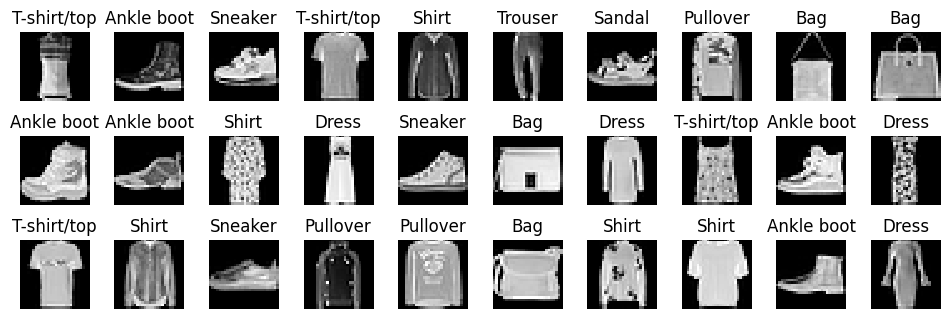

In [5]:
# Visualization of the First 50 Images

plot_digits(X_train, 30, images_per_row=10)

## A.2 - Feature Engineering

In [6]:
# Feature Scaling

X_train = X_train / 255.
X_val = X_val / 255.
X_test = X_test / 255.

## A.3 - Sequential API